# Traffic sign classification/Recognition system
By Priyakant Tanaji Jadhav


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
current_path = os.getcwd()

In [3]:
current_path = "C:\\Users\\admin\\traffic_sign\\"

In [4]:
#Retrieving the images and their labels 
for cls in range(classes):
    path = os.path.join(current_path,'train',str(cls))
    images = os.listdir(path)

    for im in images:
        try:
            image = Image.open(path + '\\'+ im)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(cls)
        except:
            print("Error loading image")

In [5]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [6]:
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [7]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Building the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, 
                    y_train, 
                    batch_size=32, 
                    epochs=epochs, 
                    validation_data=(X_test, y_test))
model.save("my_model.h5")

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 92s 3ms/step - loss: 2.1746 - acc: 0.4538 - val_loss: 0.7982 - val_acc: 0.7813
Epoch 2/15
31367/31367 [==============================] - 90s 3ms/step - loss: 0.8920 - acc: 0.7300 - val_loss: 0.4067 - val_acc: 0.8851
Epoch 3/15
31367/31367 [==============================] - 90s 3ms/step - loss: 0.6201 - acc: 0.8137 - val_loss: 0.2954 - val_acc: 0.9112
Epoch 4/15
31367/31367 [==============================] - 91s 3ms/step - loss: 0.5065 - acc: 0.8467 - val_loss: 0.2510 - val_acc: 0.9227
Epoch 5/15
31367/31367 [==============================] - 89s 3ms/step - loss: 0.4587 - acc: 0.8610 - val_loss: 0.1728 - val_acc: 0.9470
Epoch 6/15
31367/31367 [==============================] - 90s 3ms/step - loss: 0.4114 - acc: 0.8768 - val_loss: 0.1837 - val_acc: 0.9417
Epoch 7/15
31367/31367 [==============================] - 90s 3ms/step - loss: 0.4182 - acc: 0.8762 - val_loss: 0.1652 - val_acc:

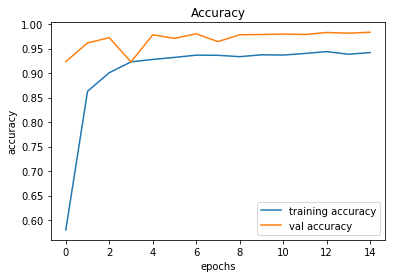

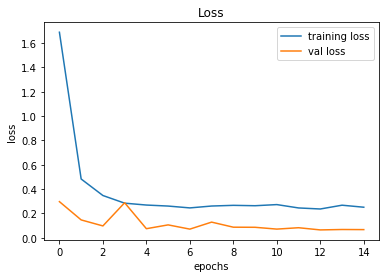

In [12]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('C:\\Users\\admin\\traffic_sign\\Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [14]:
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))



0.9569279493269992


In [15]:
pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [33]:
#score = model.evaluate(X_test, y_test, verbose = 0) 
#print('Test Loss: ', score[0]) 
#print('Test Accuracy: ', score[1]) 

Predicted sign: [13]


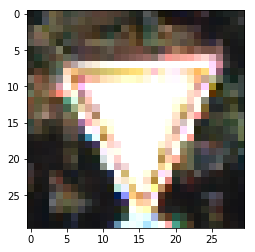

In [34]:
plt.imshow(X_test[980]) 
#X_test = X_test.reshape(1, 32, 32, 1)

prediction = str(model.predict_classes(X_test[980].reshape(1, 30, 30, 3)))
print("Predicted sign: "+ prediction) 

In [35]:
prediction

'[13]'

In [36]:
sign_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)\
', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)\
', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons\
', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles\
', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left\
', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right\
', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing \
', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits\
', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right\
', 'Keep left', 'Roundabout mandatory', 'End of no passing','End of no passing by vehicles over 3.5 metric tons']

In [38]:
pred_value = prediction[1:3]
pred_statement = sign_names[int(pred_value)]
pred_statement

'Yield'

In [ ]:
import pyttsx3
engineio = pyttsx3.init()
engineio.say(pred_statement)
engineio.runAndWait()